## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

micemerge_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID" )

# Display the data table for preview

micemerge_df.round(2)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [2]:
# Checking the number of mice.

# mice count
mice_count = len(micemerge_df["Mouse ID"].unique())


# add a frame to display 

mice_count_df = pd.DataFrame({"Total Mice":[mice_count]})

mice_count_df




,Total Mice
0,249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicatemice = micemerge_df.loc[micemerge_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
#duplicates = micemerge_df.duplicated(subset=["Mouse ID", "Timepoint"])
#duplicatemouse = micemerge_df.duplicated(subset=["Mouse ID", "Timepoint"])
#duplicatemice = duplicatemouse.loc[duplicatemouse, "Mouse ID"]


In [7]:
duplicatemice

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

#micemerge_df[micemerge_df["Mouse ID"].isin(duplicatemice)==True].round(2)
micemerge_df.loc[micemerge_df["Mouse ID"] == "g989", :].round(2)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.00,0
909,g989,Propriva,Female,21,26,0,45.00,0
910,g989,Propriva,Female,21,26,5,48.79,0
911,g989,Propriva,Female,21,26,5,47.57,0
912,g989,Propriva,Female,21,26,10,51.75,0
913,g989,Propriva,Female,21,26,10,49.88,0
914,g989,Propriva,Female,21,26,15,51.33,1
915,g989,Propriva,Female,21,26,15,53.44,0
916,g989,Propriva,Female,21,26,20,55.33,1
917,g989,Propriva,Female,21,26,20,54.66,1


In [79]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mice = micemerge_df[micemerge_df["Mouse ID"].isin(duplicatemice)==False]

clean_mice.round(2)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [80]:
# Checking the number of mice in the clean DataFrame.

mice_cleancount = len(clean_mice["Mouse ID"].unique())

mice_cleancountdf = pd.DataFrame({"Total Mice":[mice_cleancount]})

mice_cleancountdf






,Total Mice
0,248


## Summary Statistics

In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#summary_stats = pd.DataFrame(micemerge_df.groupby("Drug Regimen").count())

mean = micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
std = micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
variance = micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sem = micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean": mean,
                              "Median": median,
                              "Standard Deviation": std,
                              "Variance": variance,
                              "SEM": sem
                                })


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

#summary_stats["Mean"] = pd.DataFrame(micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())

#summary_stats["Median"] = pd.DataFrame(micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())

#summary_stats["Standard Deviation"] = pd.DataFrame(micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())

#summary_stats["Variance"] = pd.DataFrame(micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())

#summary_stats["SEM"] = pd.DataFrame(micemerge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

# Assemble the resulting series into a single summary dataframe
 
#summary_stats = summary_stats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#summary_stats.round(2)
#summary_stats
summary_stats.round(2)




,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,4.99,24.95,0.33
Ceftamin,52.59,51.78,6.27,39.29,0.47
Infubinol,52.88,51.82,6.57,43.13,0.49
Ketapril,55.24,53.70,8.28,68.55,0.60
Naftisol,54.33,52.51,8.13,66.17,0.60
Placebo,54.03,52.29,7.82,61.17,0.58
Propriva,52.32,50.85,6.51,42.35,0.51
Ramicane,40.22,40.67,4.85,23.49,0.32
Stelasyn,54.23,52.43,7.71,59.45,0.57


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats.describe

<bound method NDFrame.describe of               Mouse ID       Mean     Median  Standard Deviation   Variance  \
Drug Regimen                                                                  
Capomulin          230  40.675741  41.557809            4.994774  24.947764   
Ceftamin           178  52.591172  51.776157            6.268188  39.290177   
Infubinol          178  52.884795  51.820584            6.567243  43.128684   
Ketapril           188  55.235638  53.698743            8.279709  68.553577   
Naftisol           186  54.331565  52.509285            8.134708  66.173479   
Placebo            181  54.033581  52.288934            7.821003  61.168083   
Propriva           161  52.322552  50.854632            6.507770  42.351070   
Ramicane           228  40.216745  40.673236            4.846308  23.486704   
Stelasyn           181  54.233149  52.431737            7.710419  59.450562   
Zoniferol          182  53.236507  51.818479            6.966589  48.533355   

                 

In [11]:

# Using the aggregation method, produce the same summary statistics in a single line

summary_statdrug = micemerge_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})


summary_statdrug.round(2)


Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.85  42.35  6.51  0.51
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

Text(0.5, 1.0, 'Drug Totals')

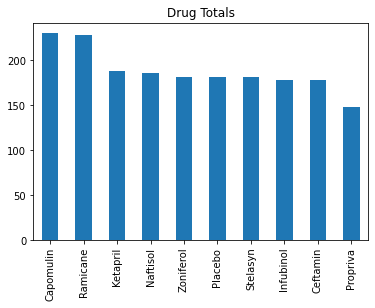

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_total = clean_mice["Drug Regimen"].value_counts()

drug_total.plot(kind="bar")

plt.title("Drug Totals")




In [13]:
drug_total

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

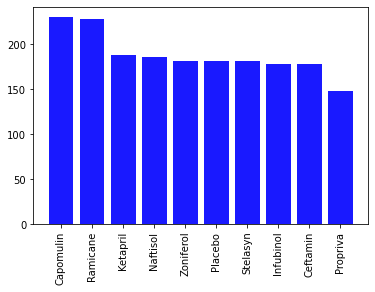

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(drug_total.index, drug_total, color='b', alpha=0.9, align="center")
plt.xticks(rotation=90)



Text(0.5, 1.0, 'Mice Gender')

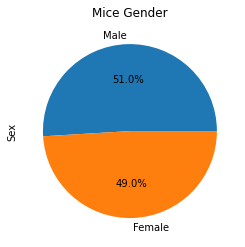

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_mice = clean_mice["Sex"].value_counts()

gender_mice.plot(kind="pie", autopct="%1.1f%%")

plt.title("Mice Gender")


Text(0.5, 1.0, 'Mice Gender')

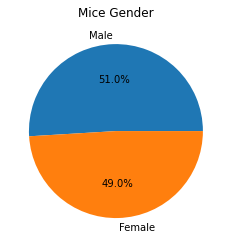

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_mice, labels=gender_mice.index,autopct="%1.1f%%")

plt.title("Mice Gender")


## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse


#max_timepoint = pd.DataFrame(micemerge_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index()

#final_tumor = max_timepoint["Mouse ID", "Timepoint"]

capomulin = micemerge_df.loc[micemerge_df["Drug Regimen"] == "Capomulin"]
ramicane = micemerge_df.loc[micemerge_df["Drug Regimen"] == "Ramicane"]
infubinol = micemerge_df.loc[micemerge_df["Drug Regimen"] == "Infubinol"]
ceftamin = micemerge_df.loc[micemerge_df["Drug Regimen"] == "Ceftamin"]
timepoint45 = micemerge_df.loc[micemerge_df["Timepoint"] == 45] 

#mouseidgroup = pd.DataFrame(micemerge_df.groupby("Mouse ID"))

#mouseidgroup2 = pd.DataFrame({"":[mice_count]})

#test_df = pd.DataFrame({"Capomulin": [capomulin],
                       # "ramicane": [ramicane]})
                                      
#test_df.head()

test_df = micemerge_df.loc[micemerge_df["Drug Regimen"] == "Capomulin"]
test_df.head()



#drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


NameError: name 'max_tumor' is not defined

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
